In [3]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from scipy.stats import multivariate_t

import matplotlib.pyplot as plt
import seaborn as sns

### Kmeans asume:
- El numero de clusters, es asignado previamente.
- Los datos son todos cuantitativos.
- La metrica que utiliza es la suma de las distancias euclideas de cada observacion al centroide de su cluster.
- La varianza de cada regresor es esferica (datos distribuidos esfericamente en cada cluster, matriz de covarianzas diagonal).
- Todos los regresores tienen la misma varianza.
- La cantidad de observaciones que pertenece a cada cluster es la misma (misma prior para cada k cluster).

In [4]:
matriz_cov = np.diag([1,1]) # misma varianza de los regresores
n = 50
mean1 = (2,2)
mean2 = (-1,-1)

np.random.seed(0)

X = pd.DataFrame(np.random.multivariate_normal(mean = mean1, cov = matriz_cov, size = n))
Y = pd.DataFrame(np.random.multivariate_normal(mean = mean2, cov = matriz_cov, size = n))

X["label"] = 0
Y["label"] = 1

data = pd.concat([X,Y], axis = 0)

data.sample(3)

,0,1,label
15,2.154947,2.378163,0
41,-1.643618,-3.223403,1
28,2.066517,2.302472,0


In [3]:
k_means = KMeans(n_clusters=2, random_state=0).fit(data.loc[:,[0,1]])

In [4]:
k_means.cluster_centers_

array([[ 1.96810624,  1.99815124],
       [-1.15756168, -0.88562019]])

In [5]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [6]:
k_means.n_iter_

3

In [7]:
# suma del cuadrado de las distancias al centro mas cercano
k_means.inertia_

200.4456948513236

Text(0.5, 1.0, 'DATOS ORIGINALES')

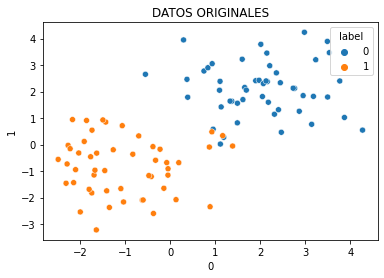

In [8]:
sns.scatterplot(data = data, x = 0, y = 1, hue = 'label');
plt.title("DATOS ORIGINALES")

Text(0.5, 1.0, 'CLUSTERS PREDICHOS')

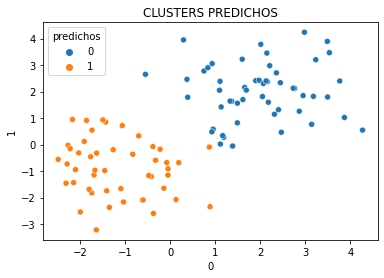

In [9]:
data_predicha = data.loc[:,[0,1]]
data_predicha['predichos'] = k_means.labels_
data_predicha.sample(3)

sns.scatterplot(data = data_predicha, x = 0, y = 1, hue = 'predichos');
plt.title("CLUSTERS PREDICHOS")

In [10]:
# Varianza en cada cluster
data_predicha.groupby("predichos").agg('var').apply(lambda x: sum(x), axis = 1)

predichos
0    2.181310
1    1.891686
dtype: float64


## Ejercicios:

1) Probar el algoritmo cambiando las normales por distribuciones t-bivariadas.

In [11]:
X_t = multivariate_t(loc = mean1, shape = matriz_cov, df=1)
Y_t = multivariate_t(loc = mean2, shape = matriz_cov, df=1)

X_t=pd.DataFrame(X_t.rvs(size = n,random_state=0))

Y_t = pd.DataFrame(Y_t.rvs(size = n, random_state= 0))

X_t["label"] = 0
Y_t["label"] = 1

data_t = pd.concat([X_t,Y_t], axis = 0)

data_t.sample(3)

,0,1,label
1,-1.463531,0.405440,1
8,-1.915267,0.516407,1
13,1.637196,3.086308,0


In [12]:
k_means_t = KMeans(n_clusters=2, random_state=0).fit(data_t.loc[:,[0,1]])

In [13]:
k_means_t.inertia_

6710.512159662341

Text(0.5, 1.0, 'CLUSTERS PREDICHOS')

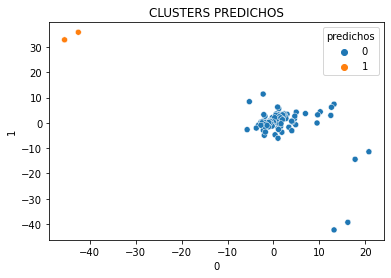

In [14]:
data_predicha_t = data_t.loc[:,[0,1]]
data_predicha_t['predichos'] = k_means_t.labels_
data_predicha_t.sample(3)

sns.scatterplot(data = data_predicha_t, x = 0, y = 1, hue = 'predichos');
plt.title("CLUSTERS PREDICHOS")

Una distribucion t, tiene mas dispersion de los datos que una Normal, cuanto mas aumente sus grados de libertad(df), mas se asemejara a ella.

Observamos que la varianza de los clusters, en este caso, es mayor que con una distribucion Normal.

In [15]:
# Varianza en cada cluster con distribucion t.
data_predicha_t.groupby("predichos").agg('var').apply(lambda x: sum(x), axis = 1)

predichos
0    69.087754
1     9.000000
dtype: float64

In [16]:
# Varianza en cada cluster con distribucion Normal(caso anterior).
data_predicha.groupby("predichos").agg('var').apply(lambda x: sum(x), axis = 1)

predichos
0    2.181310
1    1.891686
dtype: float64

### 2) Modificando las matrices de covarianza encontrar un conjunto de datos que logre un mal desempeño del algoritmo. Intentar con una configuración de tres normales bivariadas.

In [17]:
matriz_cov_2 = matriz_cov
# matriz_cov_2[0,1], matriz_cov_2[1,0]=-6,-6
mean3 = (-2,-1.5)
X_cor = pd.DataFrame(np.random.multivariate_normal(mean = mean1, cov = matriz_cov_2, size = n))
Y_cor = pd.DataFrame(np.random.multivariate_normal(mean = mean2, cov = matriz_cov_2, size = n))
Z_cor = pd.DataFrame(np.random.multivariate_normal(mean = mean3, cov = matriz_cov_2, size = n))

X_cor["label"] = 0
Y_cor["label"] = 1
Z_cor["label"] = 2

data_cor = pd.concat([X_cor,Y_cor,Z_cor], axis = 0)

k_means_features_correlacionadas = KMeans(n_clusters=3, random_state=0).fit(data_cor.loc[:,[0,1]])

/var/folders/tn/cd3fxyq15y73cctbt_8xx8qw0000gn/T/ipykernel_60158/2353878821.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  X_cor = pd.DataFrame(np.random.multivariate_normal(mean = mean1, cov = matriz_cov_2, size = n))
/var/folders/tn/cd3fxyq15y73cctbt_8xx8qw0000gn/T/ipykernel_60158/2353878821.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  Y_cor = pd.DataFrame(np.random.multivariate_normal(mean = mean2, cov = matriz_cov_2, size = n))
/var/folders/tn/cd3fxyq15y73cctbt_8xx8qw0000gn/T/ipykernel_60158/2353878821.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  Z_cor = pd.DataFrame(np.random.multivariate_normal(mean = mean3, cov = matriz_cov_2, size = n))


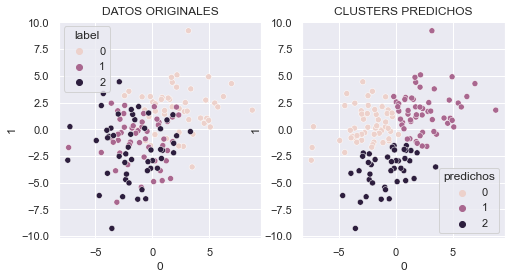

In [18]:
data_predicha_cor = data_cor.loc[:,[0,1]]
data_predicha_cor['predichos'] = k_means_features_correlacionadas.labels_
fig, ax1 = plt.subplots(1, 2)


sns.scatterplot(data = data_cor, x = 0, y = 1, hue = 'label', ax= ax1[0])

ax1[0].set_title("DATOS ORIGINALES")
sns.scatterplot(data = data_predicha_cor, x = 0, y = 1, hue = 'predichos', ax = ax1[1])
ax1[1].set_title("CLUSTERS PREDICHOS")

sns.set(rc = {'figure.figsize':(8,4)})
plt.show()

In [11]:
# Varianza en cada cluster.
data_predicha_cor.groupby("predichos").agg('var').apply(lambda x: sum(x), axis = 1)

predichos
0    1.241187
1    1.702672
2    1.358495
dtype: float64

Observamos que tenemos una varianza baja de los clusters, pero eso no quiere decir que el algoritmo haya agrupado correctamente, vemos que para el cluster 2, comete bastantes errores

### 3) ¿Es posible que algunos valores atípicos pueden quebrar el algoritmo? Probar agregando algunos outliers al conjunto de datos que usamos al comienzo.

In [20]:
X_out = pd.DataFrame(np.random.multivariate_normal(mean = mean1, cov = matriz_cov, size = n))
Y_out = pd.DataFrame(np.random.multivariate_normal(mean = mean2, cov = matriz_cov, size = n))

outliers_index=np.random.randint(1,n,5)

X_out.iloc[outliers_index, [0,1]] = X_out.iloc[outliers_index, [0,1]].apply(lambda x: x*5)
Y_out.iloc[outliers_index, [0,1]] = Y_out.iloc[outliers_index, [0,1]].apply(lambda x: x*-5)


X_out["label"] = 0
Y_out["label"] = 1

data_out = pd.concat([X_out,Y_out], axis = 0)

k_means_outliers = KMeans(n_clusters=2, random_state=0).fit(data_out.loc[:,[0,1]])

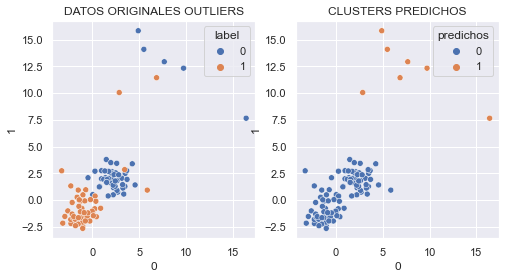

In [21]:
data_predicha_out = data_out.loc[:,[0,1]]
data_predicha_out['predichos'] = k_means_outliers.labels_
fig, ax1 = plt.subplots(1, 2)


sns.scatterplot(data = data_out, x = 0, y = 1, hue = 'label', ax= ax1[0])

ax1[0].set_title("DATOS ORIGINALES OUTLIERS")
sns.scatterplot(data = data_predicha_out, x = 0, y = 1, hue = 'predichos', ax = ax1[1])
ax1[1].set_title("CLUSTERS PREDICHOS")

plt.show()

Observamos como valores atipicos, rompen completamente el algoritmo, esto se debe a que la medida que utiliza para encontrar la mejor clasificacion por cluster, es sensible a outliers, es la distancia euclidea.

### 4) Programar el algoritmo de kmeans y comparar con la implementación estándar.

In [22]:
class kmeans():
    def __init__(self,n_clusters):
        self.n_clusters = n_clusters

    def fit(self, X):
        self.X = X.copy()
        self.k = np.random.randint(0, self.n_clusters, self.X.shape[0])
        self.X["cluster"] = self.k
        self.centroids = self.X.groupby('cluster').mean()
        
        
    def predict(self):
        apagar = False
        nuevos_clusters_dic={}
        
        while apagar == False:
            distancia_euclidea=[]
            nuevos_clusters = []
            cluster_paso_anterior = np.arange(self.X.shape[0])
            for row in range(self.X.shape[0]):
                for cluster in range(self.n_clusters):
                    distancia_euclidea.append(sum(np.sqrt((self.centroids.to_numpy()[cluster]-self.X.drop('cluster', axis = 1).to_numpy()[row])**2)))
                nuevos_clusters.append(np.argmin(distancia_euclidea))
                distancia_euclidea.clear()    
            nuevos_clusters_series = pd.Series(nuevos_clusters)
            
            if(self.X["cluster"].equals(nuevos_clusters_series)):
                apagar = True
                return self.X
            
            self.X["cluster"]=nuevos_clusters_series

In [41]:
X_kmeans = pd.DataFrame(np.random.multivariate_normal(mean = (97,102), cov = matriz_cov, size = 100))
Y_kmeans = pd.DataFrame(np.random.multivariate_normal(mean = (100,102), cov = matriz_cov, size = 100))

X_kmeans["label"] = 0
Y_kmeans["label"] = 1

data_kmeans = pd.concat([X_kmeans,Y_kmeans], axis = 0)
data_kmeans = data_kmeans.reset_index(drop=True)

In [42]:
kmeans_1 = kmeans(2)
kmeans_1.fit(data_kmeans[[0,1]])
data_clusterizada = kmeans_1.predict()
data_clusterizada.sample(3)

kmeans_sklearn = KMeans(n_clusters=2).fit(data_kmeans[[0,1]])

data_clusterizada_sk = data_kmeans[[0,1]]
data_clusterizada_sk["clusters"] = kmeans_sklearn.labels_


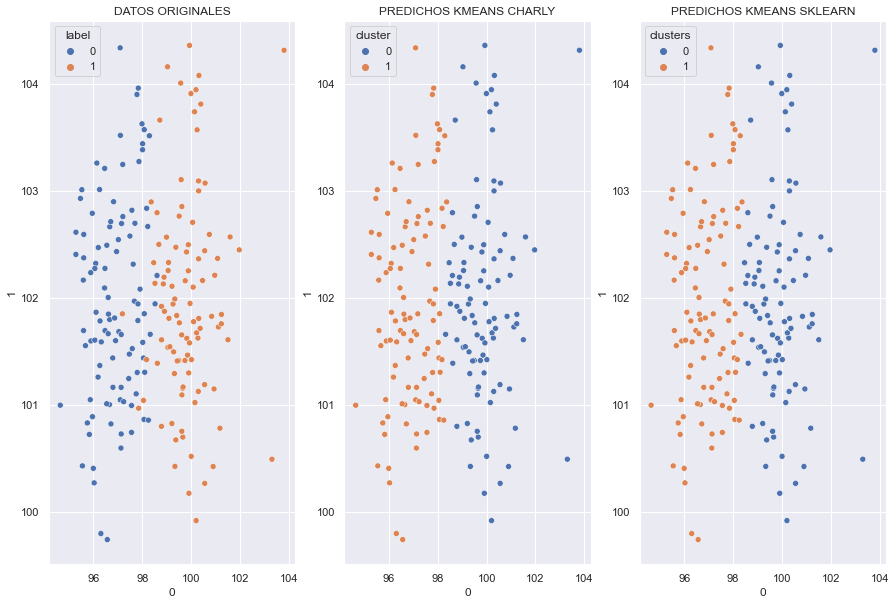

In [43]:
fig, ax1 = plt.subplots(1, 3)


sns.scatterplot(data = data_kmeans, x = 0, y = 1, hue = 'label', ax= ax1[0])
ax1[0].set_title("DATOS ORIGINALES")

sns.scatterplot(data = data_clusterizada, x = 0, y = 1, hue = 'cluster', ax = ax1[1])
ax1[1].set_title("PREDICHOS KMEANS CHARLY")

sns.scatterplot(data = data_clusterizada_sk, x = 0, y = 1, hue = 'clusters', ax = ax1[2])
ax1[2].set_title("PREDICHOS KMEANS SKLEARN")

plt.rcParams['figure.figsize']=(15,10)

plt.show()

Considerando que a diferencia del mio sklearn hace varias iteraciones, poniendo la semilla de manera aleatoria, para bajar las chances de caer en un minimo local, da bastante bien..

### *Observamos como kmeans, supone una distribucion esferica de los datos que conforman los clusters, si la naturaleza de los datos, tiene otra geometria, performara mal.*

# SEGMENTACION EN IMAGENES CON K-MEANS Y OPENCV

https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html

In [3]:
import cv2

In [27]:
path = "../tp1_K-means/00_images/costa.jpeg"
# path = "../tp1_K-means/delfi.jpg"
image = cv2.imread(path)
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [28]:
# We going to use the cv2.kmeans() function, which takes a 2D array as input, and since our original image is 3D (width, height, and depth of 3 RGB values)
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
pixel_values.shape

(366800, 3)

In [29]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, 0.05)

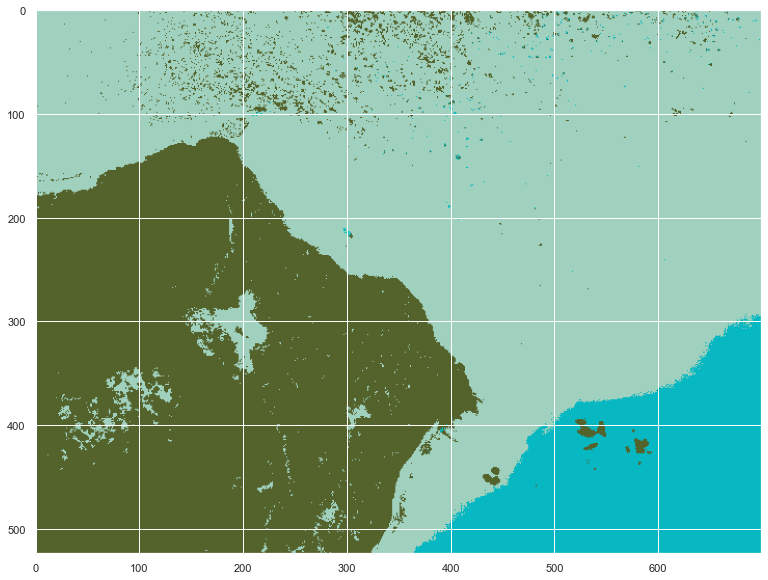

In [30]:
# number of clusters (k)
# labels array is the cluster label for each pixel which is either 0, 1, or 2 (since k = 3), 
# centers refer to the center points (each centroid's value).

k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)
# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

### Si quisieramos quitar algun cluster (color) de una imagen

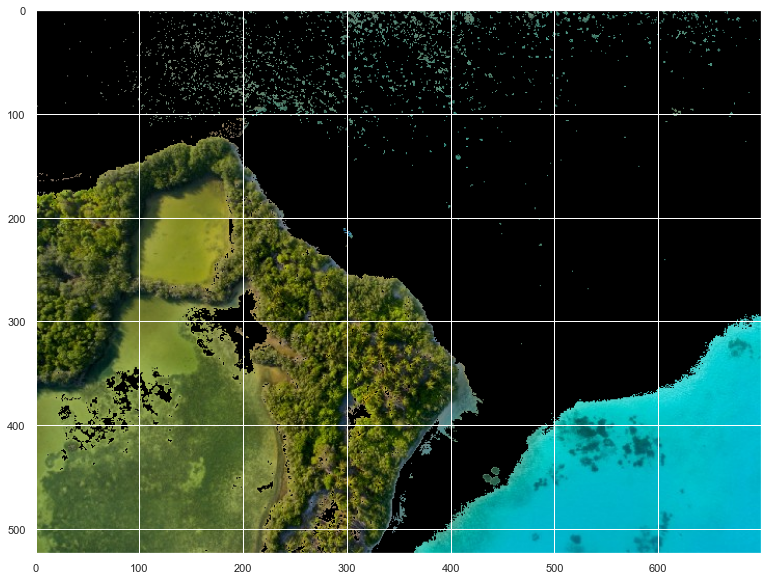

In [31]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 1
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()

## Ejercicios

1) Incrementar la cantidad de grupos y describir qué sucede con la imagen segmentada. ¿Cuántos grupos parecen razonables?¿Por qué?

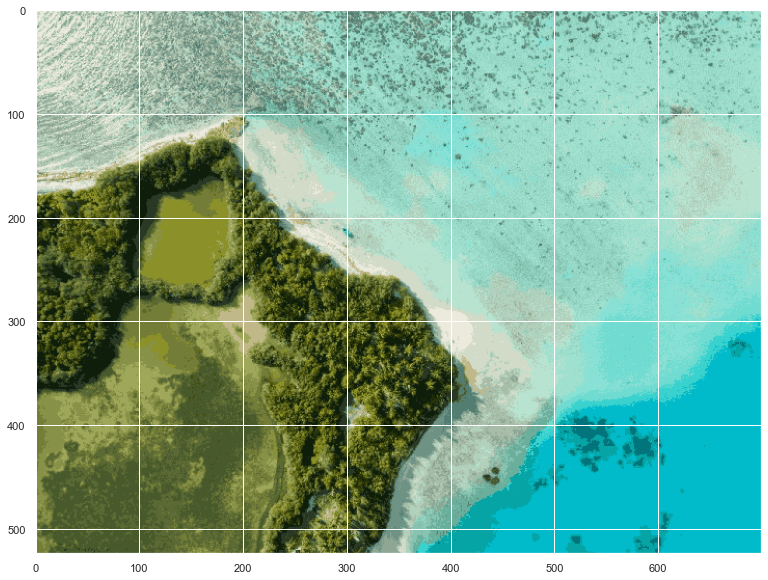

In [32]:
k = 30
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)
# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

A medida que aumentamos la cantidad de clusters, la imagen tiene mayor definicion, pero tambien aumenta su costo computacional de procesamiento. El numero de grupos correcto, dependera de la cantidad de colores que tenga la imagen a segmentar y la calidad deseada de segmentacion, teniendo en cuenta el mayor costo computacional que requiere una mayor cantidad de clusters.

2) Aplicar esto mismo a las imágenes que se encuentran en los archivos:

- manos.png
- 4.png
- lobo.jpeg

¿Funciona igual en todas las imágenes? Discutir los resultados que se vayan obteniendo.

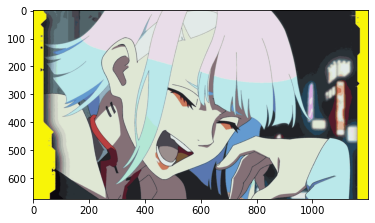

In [7]:
# path = "../tp1_K-means/00_images/jujuy.png"
# path = "../tp1_K-means/00_images/lucy.jpg"
path = "../tp1_K-means/00_images/EdgerunnersLucy.jpg"
image = cv2.imread(path)
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
pixel_values.shape

# define stopping criterias
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, 0.05)


k = 30
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)
# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

No funciona igual en todas las imagenes, cada imagen tiene una cantidad distinta de colores que la conforma y por tanto no se segmenta con la misma calidad con la misma cantidad de clusters.